**NYC AIRBNB EDA PROJECT**

Variable Understanding:
Listing_id :- This is a unique identifier for each listing in the dataset.  
Listing_name :- This is the name or title of the listing, as it appears on the Airbnb website.  
Host_id :- This is a unique identifier for each host in the dataset.  
Host_name :- This is the name of the host as it appears on the Airbnb website.  
Neighbourhood_group :- This is a grouping of neighbourhoods in New York City, such as Manhattan or Brooklyn.  
Neighbourhood :- This is the specific neighbourhood in which the listing is located.  
Latitude :- This is the geographic latitude of the listing.  
Longitude :- This is the geographic longitude of the listing.  
Room_type :- This is the type of room or property being offered, such as an entire home, private room, shared room.  
Price :- This is the nightly price for the listing, in US dollars.  
Minimum_nights :- This is the minimum number of nights that a guest must stay at the listing.  
Total_reviews :- This is the total number of reviews that the listing has received.  
Reviews_per_month :- This is the average number of reviews that the listing receives per month.  
Host_listings_count :- This is the total number of listings that the host has on Airbnb.  
Availability_365 :- This is the number of days in the next 365 days that the listing is available for booking.  

In [2]:
## Importing the libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg
import plotly.express as px
import folium
from folium.plugins import HeatMap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


In [3]:
## Load the data
data=pd.read_csv("C:/Users/Admin/OneDrive/Desktop/Airbnb_EDA/Airbnb NYC 2019.csv")

In [4]:
data.head()

id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude   
0         John            Brooklyn    Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review   
0     Private room    149               1                  9  2018-10-19  \
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

**Data Preprocessing**

In [5]:
# check duplicate rows in dataset
data = data.drop_duplicates()
data.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

no duplicates


In [6]:
# checking null values of each columns
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#host_name and listing_name are not that much of null values, so first we are good to fill those with some substitutes in both the columns first.
data['name'].fillna('unknown',inplace=True)
data['host_name'].fillna('no_name',inplace=True)


In [8]:
#null values are now removed
data[['host_name','name']].isnull().sum()

host_name    0
name         0
dtype: int64

In [9]:
# last_review and reviews_per_month have total 10052 null values each.
# last_review column is not required for our analysis as compared to number_of_reviews & reviews_per_month
data = data.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important


In [10]:
data.info()      #last_review column is deleted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [11]:
#replacing reviews per month nan values with 0

data['reviews_per_month'].fillna(0, inplace=True)
data['reviews_per_month'].isnull().sum()  #null values replaced by 0

0

**Clean Price Variable :** As the price column consist of 0's(11 obs) so we remove them as they do not add any value in our analysis


In [12]:
data.drop(data[data['price'] <=0].index,inplace=True)

***Dealing with Outliers using IQR Technique***

In [13]:
Q1 = np.percentile(data['price'], 25)
Q3 = np.percentile(data['price'], 75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)     
print(f"IQR is {IQR}, lower_range is {lower_range} and upper_range is {upper_range}")

IQR is 106.0, lower_range is -90.0 and upper_range is 334.0


In [14]:
data[data['price'] > 333].count()[0] / data.shape[0] * 100 #outliers are 6.08% of total data

6.089927174535635

In [15]:
data = data[(data.price > lower_range) & (data.price < upper_range)] #removing outliers

**QUESTION 1**
What are the most popular neighbourhoods for Airbnb rentals in New York City? How do prices and availability vary by neighborhood?




In [16]:
top_neighbour = data['neighbourhood'].value_counts().to_frame(name='count').nlargest(5,'count')
popular_neighbourhood = data[data['neighbourhood'].isin(top_neighbour.index)]

<Axes: xlabel='neighbourhood'>

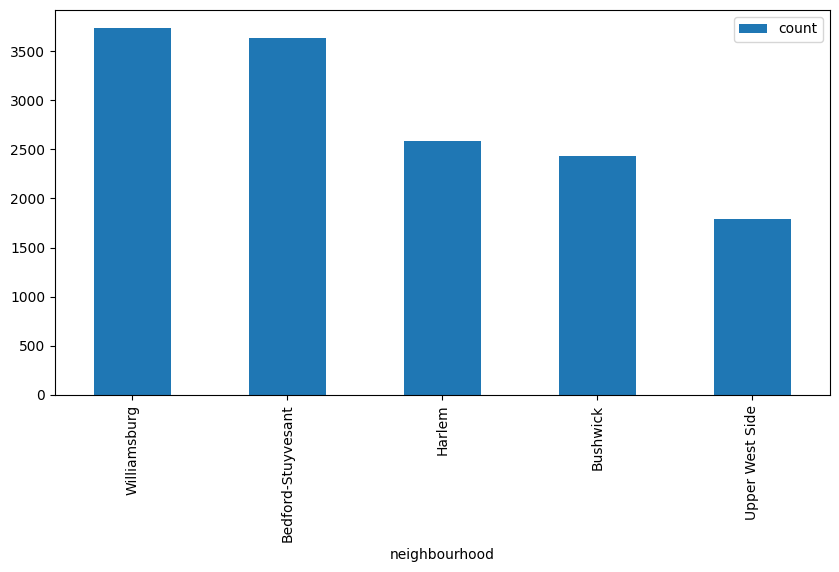

In [17]:
top_neighbour.plot(kind='bar',figsize=(10,5))

**Interpretation**
Williamsburg and Bedford-Stuyvesant are the most popular neighbourhoods based on their listings.

Let's try to understand how the price and availability vary for these neighbourhoods

C:\Users\Admin\AppData\Local\Temp\ipykernel_9424\602577279.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


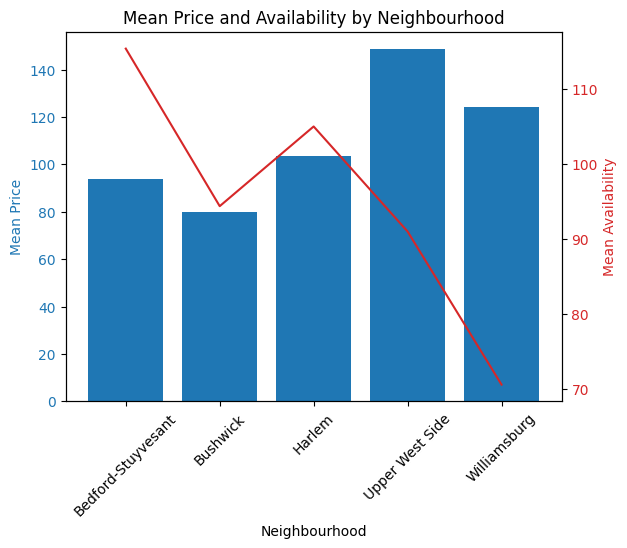

In [18]:
# Group by neighbourhood_group and calculate the mean price and availability
mean_price_by_neighbourhood = popular_neighbourhood.groupby('neighbourhood')['price'].mean()
mean_avail_by_neighbourhood = popular_neighbourhood.groupby('neighbourhood')['availability_365'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot mean price on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Mean Price', color=color)
ax1.bar(mean_price_by_neighbourhood.index, mean_price_by_neighbourhood, color=color)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for mean availability
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Availability', color=color)
ax2.plot(mean_avail_by_neighbourhood.index, mean_avail_by_neighbourhood, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Mean Price and Availability by Neighbourhood')

# Show the plot
plt.show()


**Interpretation**
1. Williamsburg has the lowest availability and has 2nd highest price where as Upper west side has moderate availability with highest price
2. BedFord-Stuyvesant has highest availability but low price.
3. The prices are high for Williamsburg ,Upper west side as it is in the Manhattan which is the main city with high popularity and many famous spots in New York
4. But the other neighbourhood such as BedFord-Stuyvesant of Brooklyn are less famous as they are far from main region of New York so the prices are low.

**QUESTION 2**
How has the Airbnb market in New York City changed over time? Have there been any significant trends in terms of the number of listings, prices, or occupancy rates?


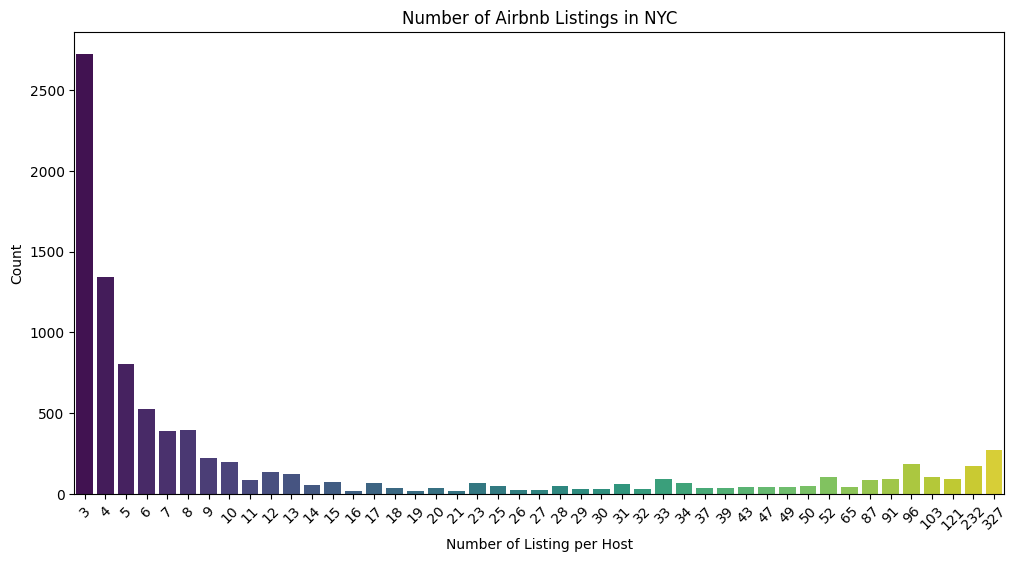

In [19]:
df = data[data.calculated_host_listings_count > 2]
# Number of listings
plt.figure(figsize=(12, 6))
sns.countplot(x='calculated_host_listings_count', data=df, palette='viridis')
plt.title('Number of Airbnb Listings in NYC')
plt.xlabel('Number of Listing per Host')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**INTERPRETATION**

There are high number of hosts with number of listing between 2-6.  
Number of hosts having listing more than 7 are less than 500 per listing.  
Hightest number of listings per host is 327, around 350 hosts have these many properties in NYC.  

In [20]:
data['Occupancy Rate_avail'] = (data['availability_365'] / 365 )* 100

In [21]:
neighbourhood_group_stats = data.groupby('neighbourhood_group').agg(
    num_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_availability=('availability_365', 'mean'),
    Occupancy_rate=('Occupancy Rate_avail', 'mean')
)
top_neighbour = data['neighbourhood'].value_counts().to_frame(name='count').nlargest(5,'count')
popular_neighbourhood = data[data['neighbourhood'].isin(top_neighbour.index)]

popular_neighbourhood_stats = popular_neighbourhood.groupby('neighbourhood').agg(
    num_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_availability=('availability_365', 'mean'),
    Occupancy_rate=('Occupancy Rate_avail', 'mean')
)
neighbourhood_group_stats.reset_index(inplace=True)
popular_neighbourhood_stats.reset_index(inplace=True)

neighbourhood_group_stats


neighbourhood_group  num_listings   avg_price  avg_availability   
0               Bronx          1069   77.437792        164.599626  \
1            Brooklyn         19406  105.748634         98.484335   
2           Manhattan         19500  145.912103        105.843128   
3              Queens          5567   88.904437        143.019041   
4       Staten Island           365   89.235616        199.893151   

   Occupancy_rate  
0       45.095788  
1       26.982010  
2       28.998117  
3       39.183299  
4       54.765247

In [22]:
popular_neighbourhood_stats

neighbourhood  num_listings   avg_price  avg_availability   
0  Bedford-Stuyvesant          3634   94.019538        115.322234  \
1            Bushwick          2435   79.978645         94.341273   
2              Harlem          2585  103.536944        104.954352   
3     Upper West Side          1788  148.526846         90.967002   
4        Williamsburg          3731  124.239882         70.576253   

   Occupancy_rate  
0       31.595133  
1       25.846924  
2       28.754617  
3       24.922466  
4       19.335960

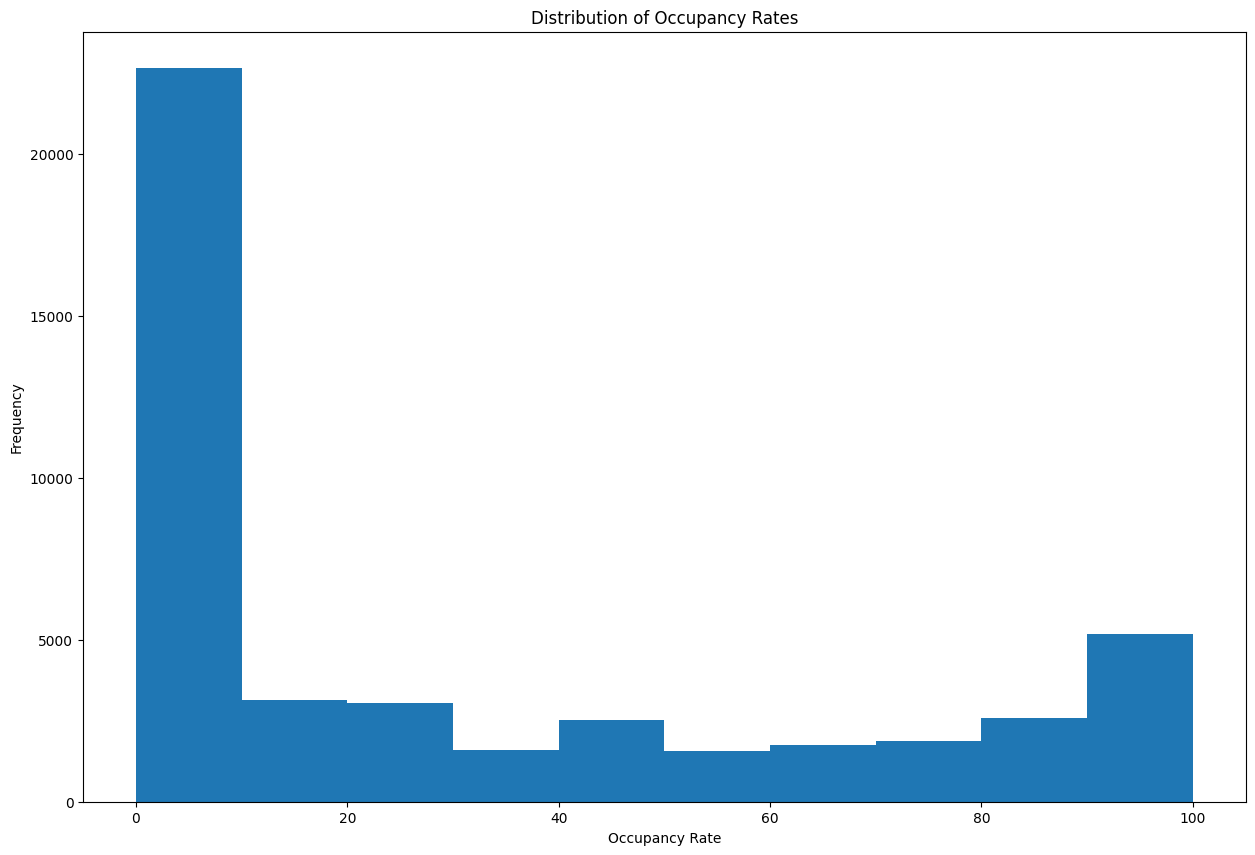

In [23]:
data["Occupancy Rate_avail"].plot(kind='hist', figsize=(15, 10))
plt.title("Distribution of Occupancy Rates")
plt.xlabel("Occupancy Rate")
plt.ylabel("Frequency")
plt.show()

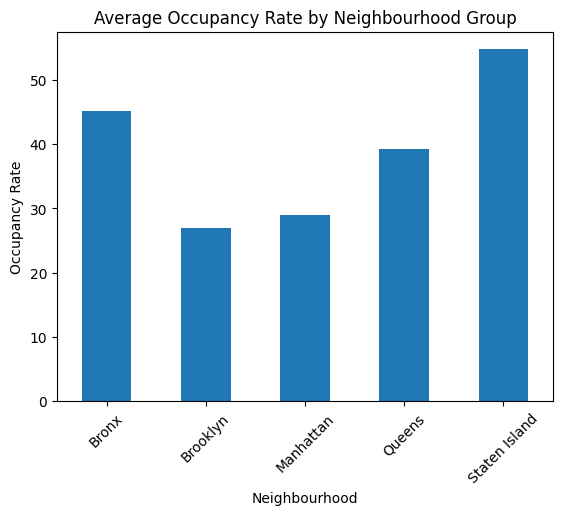

In [24]:
avg_occupancy_by_neighbourhood_group = data.groupby("neighbourhood_group")["Occupancy Rate_avail"].mean()
avg_occupancy_by_neighbourhood_group.plot(kind="bar")
plt.title("Average Occupancy Rate by Neighbourhood Group")
plt.xlabel("Neighbourhood")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=45)
plt.show()

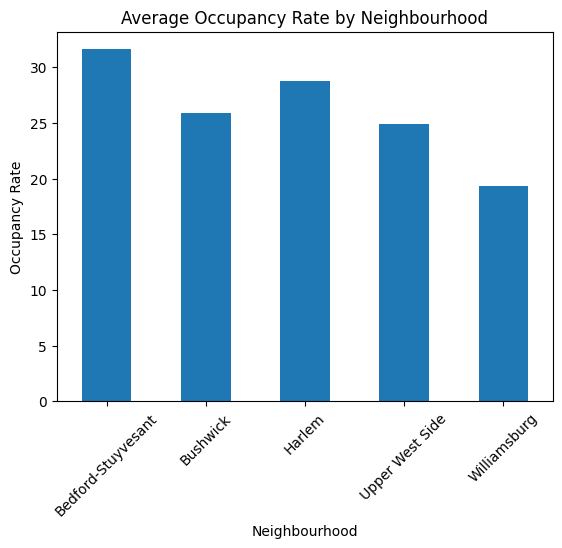

In [25]:
avg_occupancy_by_popular_neighbourhood = popular_neighbourhood.groupby("neighbourhood")["Occupancy Rate_avail"].mean()
avg_occupancy_by_popular_neighbourhood.plot(kind="bar")
plt.title("Average Occupancy Rate by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='neighbourhood', ylabel='num_listings'>

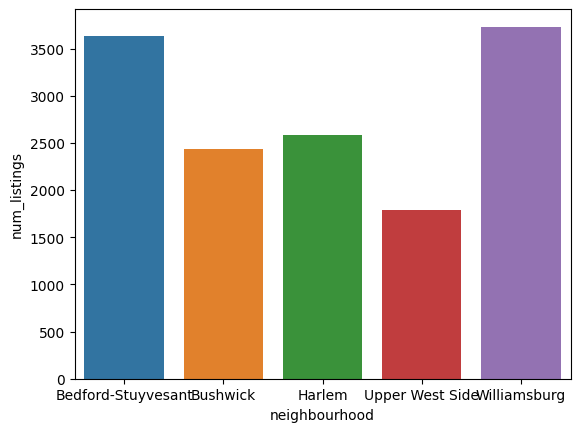

In [26]:
sns.barplot(data=popular_neighbourhood_stats, x='neighbourhood',y='num_listings')


**Interpretation**
1. Here BedFord-Stuyvesant and Williamsburg are most popular neighbourhood with high avg availability and Occupancy_rate.
2. Also Upper West Side is not that famous but has highest avg price.
3. This must be due to the 80/20 rule that only 20 % of the customers are premium customers and other 80% are the average one's.
4. The occupancy rate is mostly 0-20% and very few has > 20% occupancy rate.
5. Staten Island has the highest occupancy and Bronx is the 2nd highest.

**QUESTION 3**
Are there any patterns or trends in terms of the types of properties that are being rented out on Airbnb in New York City? Are certain types of properties more popular or more expensive than others?

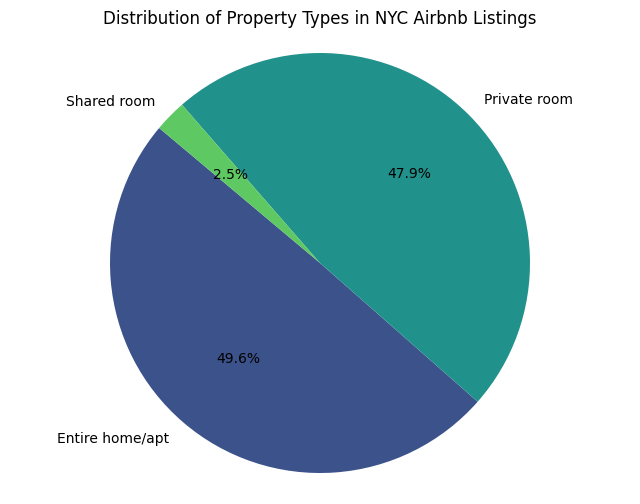

room_type
Entire home/apt    22782
Private room       21989
Shared room         1136
Name: count, dtype: int64room_type
Entire home/apt    162.503731
Private room        79.043658
Shared room         59.397887
Name: price, dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analyze the distribution of property types
property_type_distribution = data['room_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(property_type_distribution, labels=property_type_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(property_type_distribution)))
plt.title('Distribution of Property Types in NYC Airbnb Listings')
plt.axis('equal') 
plt.show()

print(property_type_distribution,end="")

# Calculate the average pricing for each type of room
average_price_by_room_type = data.groupby('room_type')['price'].mean()

print(average_price_by_room_type)


**Interpretation**

Entire home/apt is the most booked room type followed by private rooms and shared rooms are booked the least, we also see that shared room price has a very cheap average price for their room


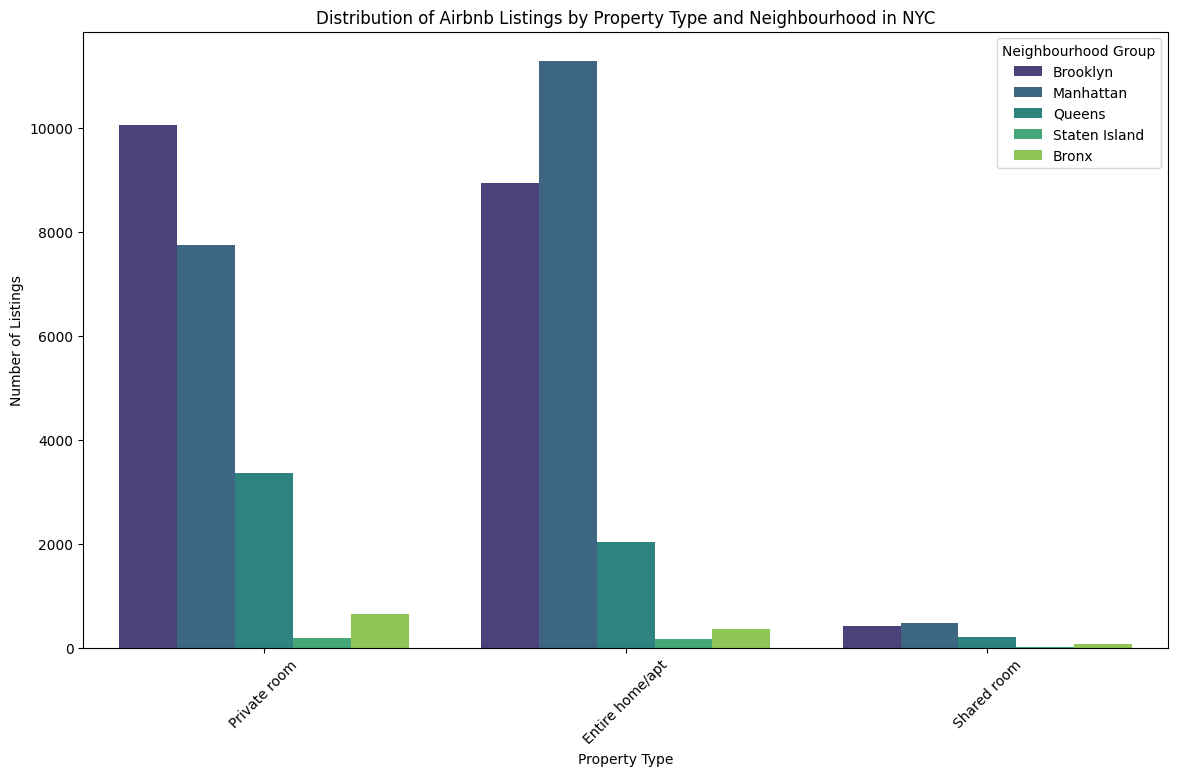

In [28]:
plt.figure(figsize=(14, 8))
sns.countplot(x='room_type', hue='neighbourhood_group', data=data, palette='viridis')
plt.title('Distribution of Airbnb Listings by Property Type and Neighbourhood in NYC')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.show()

**INTERPRETATION**  
1. Brooklyn has highest number of private rooms whereas Manhattan is famous for Entire home/apt.
2. Also the shared rooms are very less compared to other types must be because people prefer to rent it out than to share it.

**QUESTION 4 :** 
Are there any factors that seem to be correlated with the prices of Airbnb rentals in New York City? 


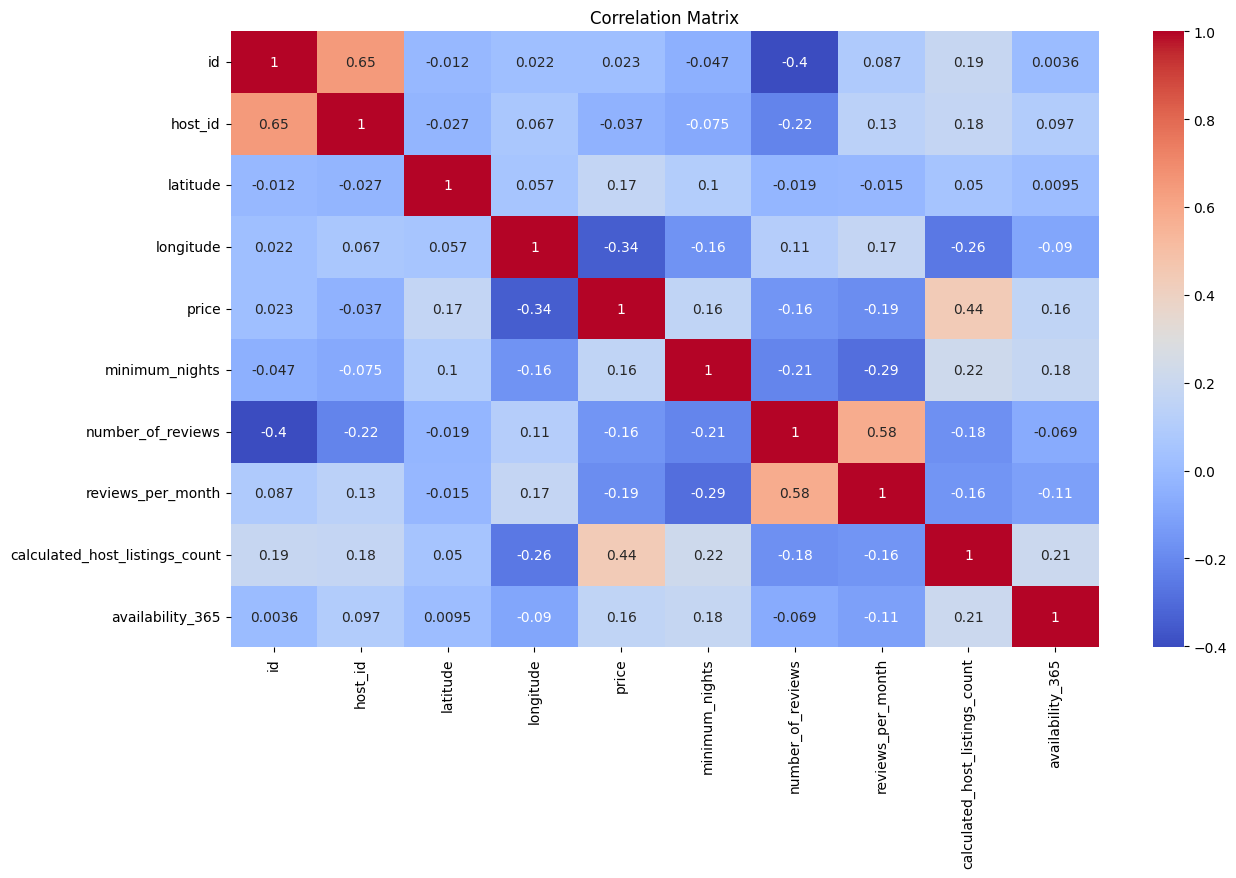

In [29]:
plt.figure(figsize=(14, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Interpretation**
Price has positive correlation of 0.16 with minimum nights for listing.  
Also it has a negative correlation with reviews_per_month as the price increases customers are more robust to go for that room.  
Also it has a high positive correlation(0.44) with host listings count as more the number of listings higher the prices.  

**Question 5 :** 
The best area in New York City for a host to buy property at a good price rate and in an area with high traffic?

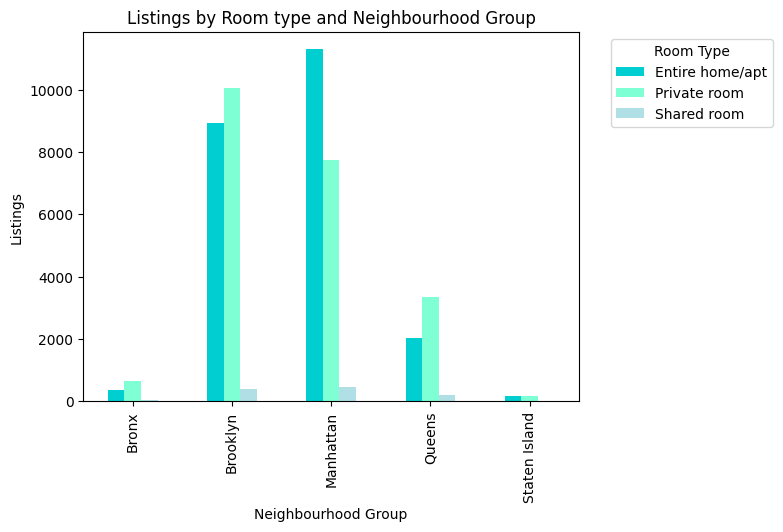

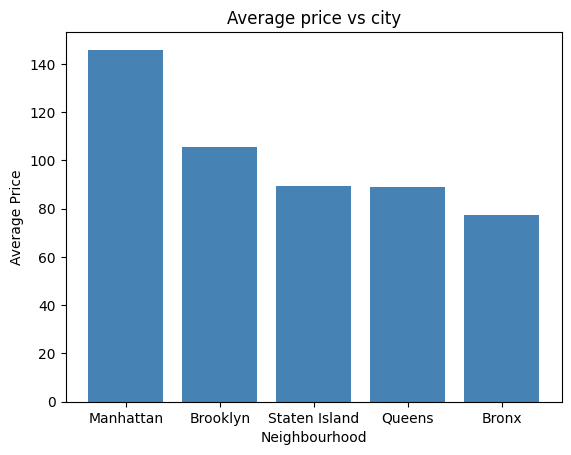

In [30]:
df_rtype = data.pivot_table(values='id',index='neighbourhood_group',columns='room_type',aggfunc = 'count')

#for high trafic, we check the listing per neighbourhood group

df_rtype.plot(kind='bar',color=["darkturquoise","aquamarine","powderblue"])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Listings')
plt.title('Listings by Room type and Neighbourhood Group')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#for best price, we check the average price vs neighbourhood group
df_price = data.groupby('neighbourhood_group')['price'].mean().reset_index()
df_price=df_price.rename(columns={'price': 'Average Price'})
df_price=df_price.sort_values(by='Average Price',ascending=False)

plt.bar(df_price['neighbourhood_group'],df_price['Average Price'],color="steelblue")


plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.title("Average price vs city")

plt.show()

**INTERPRETATION**

Based on the data, Brooklyn seems like a good choice for hosts because the prices are not too high and there are a lot of listings available.

**Question 6 :** 
How do the lengths of stay for Airbnb rentals in New York City vary by neighbourhood? 
Do certain neighbourhoods tend to attract 

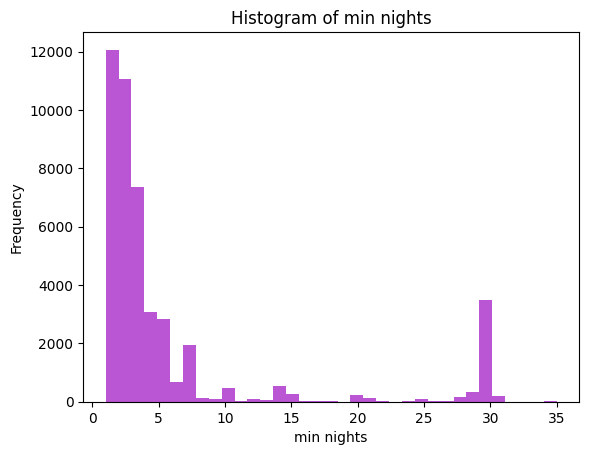

In [31]:
data.head()

plt.hist(data['minimum_nights'], bins=35,range=(1,35), color='Mediumorchid')
plt.xlabel('min nights')
plt.ylabel('Frequency')
plt.title('Histogram of min nights')
plt.show()

In [32]:
df_minnights = data.pivot_table(values='id',index='neighbourhood_group',columns='minimum_nights',aggfunc='count')
# Making Bins
df_bin_minnights = data.copy()
df_bin_minnights['Bins_nights']=np.where(df_bin_minnights['minimum_nights']<=3,'Short_Stay',(np.where((df_bin_minnights['minimum_nights']>=4) & (df_bin_minnights['minimum_nights']<=7),'Medium_Stay','Long_Stay')))
df_bin_minnights[['minimum_nights','Bins_nights']]
df_bin_minnights_pv=df_bin_minnights.pivot_table(values='id',index='neighbourhood_group',columns='Bins_nights',aggfunc='count')
df_bin_minnights_pv

Bins_nights          Long_Stay  Medium_Stay  Short_Stay
neighbourhood_group                                    
Bronx                       63          126         880
Brooklyn                  2413         3893       13100
Manhattan                 3791         3653       12056
Queens                     585          780        4202
Staten Island               25           63         277

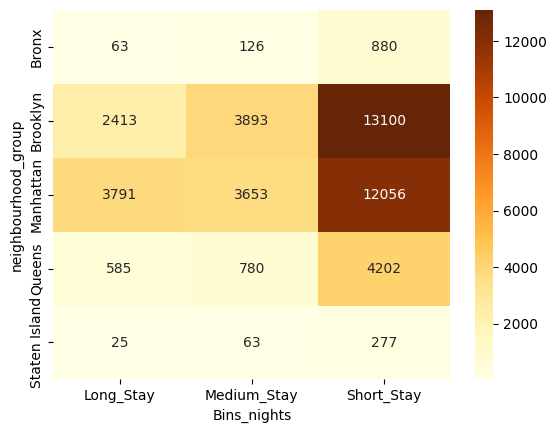

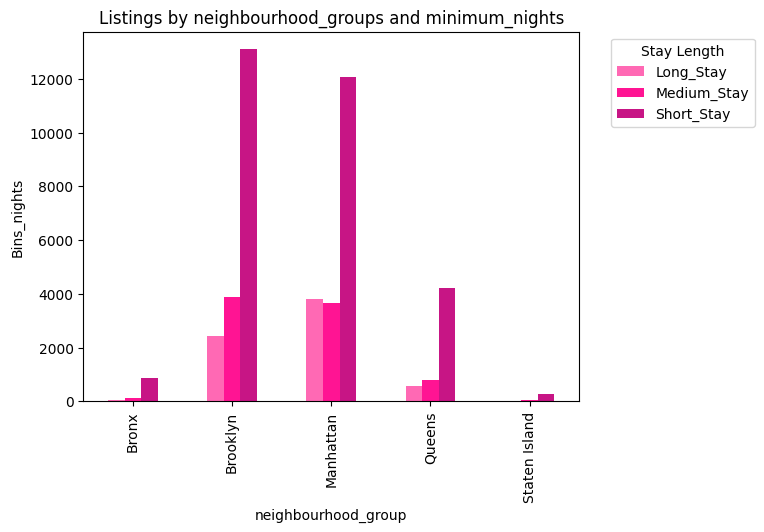

In [33]:
sns.heatmap(df_bin_minnights_pv, annot=True, fmt='g', cmap='YlOrBr')
plt.show()

df_bin_minnights_pv.plot(kind='bar',color=["hotpink","deeppink","mediumvioletred"])
plt.xlabel('neighbourhood_group')
plt.ylabel('Bins_nights')
plt.title('Listings by neighbourhood_groups and minimum_nights')
plt.legend(title='Stay Length', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 **Interpretation**   
In each neighborhood group, the majority of stays fall into the "Short Stay" category, which includes stays lasting 1-3 days. Brooklyn has the highest number of short stays, followed by Manhattan and Queens.

**Question7**  
 How do the ratings of Airbnb rentals in NYC compare to their prices? Are Higher price rentals more likely to have higher ratings?

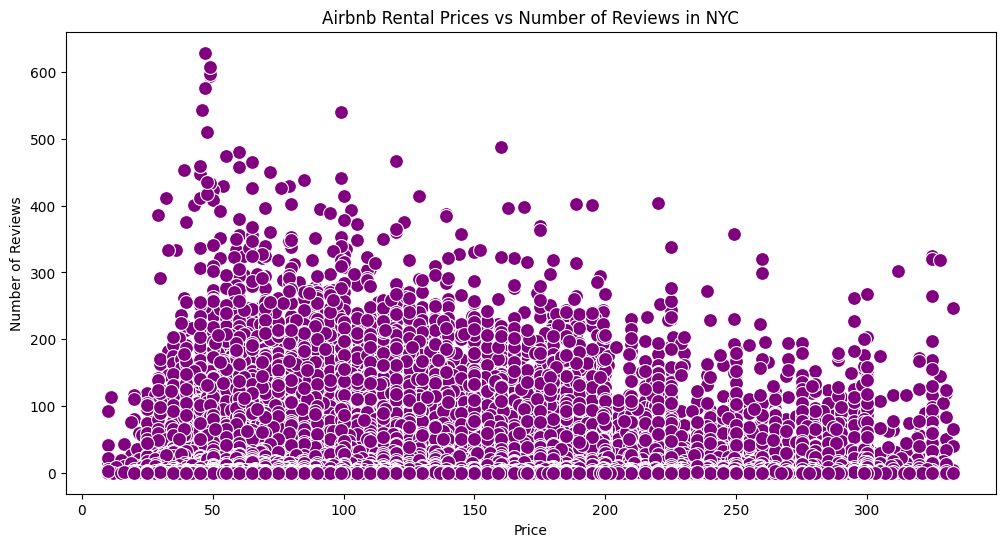

In [34]:
# Create a scatter plot with price and number of reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data, color='purple', s=100)

# Add labels and title
plt.title('Airbnb Rental Prices vs Number of Reviews in NYC')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

plt.show()

**Interpretation :**  
Here the number of reviews are decreasing as price of listing is increasing.  
Rooms with lower price (<200) on an avg have more ratings than higher price rooms, so higher price rooms do not tend to have higher ratings

C:\Users\Admin\AppData\Local\Temp\ipykernel_9424\3712969224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7_1['price_range'] = pd.cut(df7_1['price'], bins=bins, labels=labels, right=False)


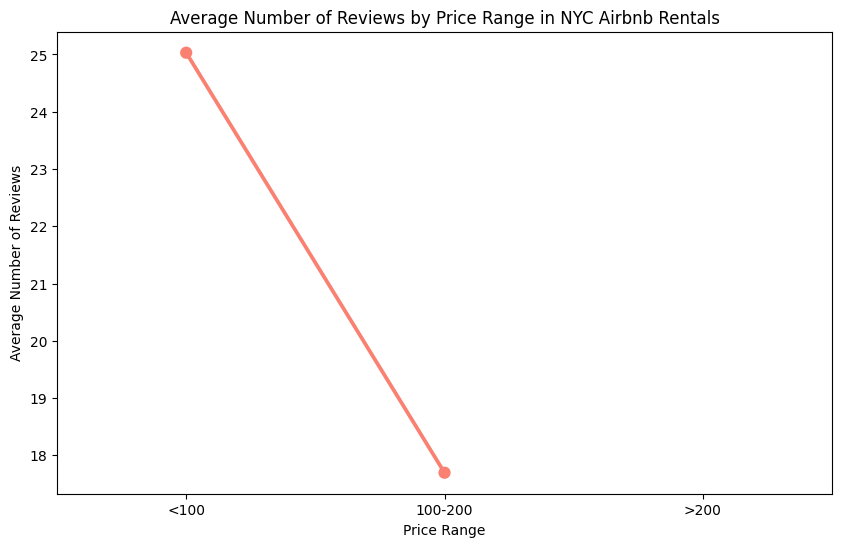

In [35]:
# Categorize the data into price ranges
bins = [0, 200, 500, float('inf')]
labels = ['<100', '100-200', '>200']
df7_1 = data[['price','number_of_reviews']]
df7_1['price_range'] = pd.cut(df7_1['price'], bins=bins, labels=labels, right=False)

# Calculate the average number of reviews for each price range
avg_reviews_by_price_range = df7_1.groupby('price_range')['number_of_reviews'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
#plt.bar(avg_reviews_by_price_range['price_range'], avg_reviews_by_price_range['number_of_reviews'], color='salmon')
# Create a point plot
sns.pointplot(x='price_range', y='number_of_reviews', data=avg_reviews_by_price_range, color='salmon', markers='o')

# Add labels and title
plt.title('Average Number of Reviews by Price Range in NYC Airbnb Rentals')
plt.xlabel('Price Range')
plt.ylabel('Average Number of Reviews')

plt.show()

**INTERPREATATION**

Listing with lower price range seems to have higher ratings, with average ratings as above.

**Question8**  
 Find the total number of reviews and Maximum reviews by each neighbourhood groups

In [36]:
data.groupby(['neighbourhood_group'])['reviews_per_month'].sum()
#manhattan has max no of reviews

neighbourhood_group
Bronx             1600.67
Brooklyn         20575.02
Manhattan        19281.97
Queens            8807.19
Staten Island      587.88
Name: reviews_per_month, dtype: float64

<Figure size 1200x800 with 0 Axes>

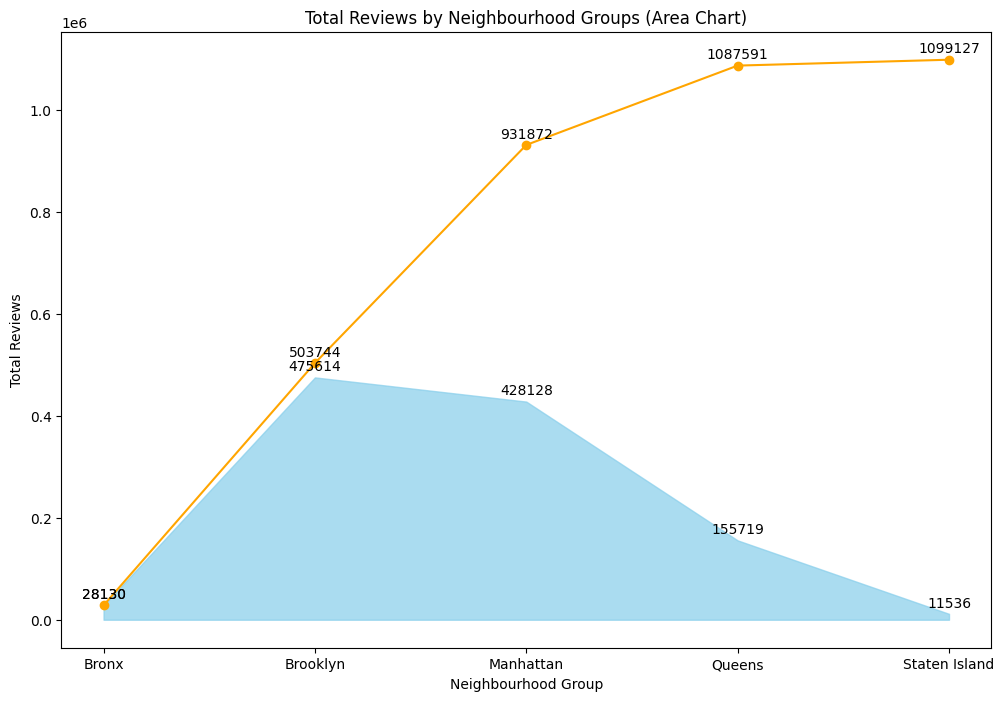

In [37]:
# Create a stacked bar chart using Matplotlib
plt.figure(figsize=(12, 8))

# Group by Neighbourhood_Group to find total reviews
grouped_reviews = data.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()

# Calculate cumulative total reviews
grouped_reviews['Cumulative_Reviews'] = grouped_reviews['number_of_reviews'].cumsum()

# Create an area chart using Matplotlib
plt.figure(figsize=(12, 8))

# Area chart for total reviews
plt.fill_between(grouped_reviews['neighbourhood_group'], grouped_reviews['number_of_reviews'], color='skyblue', alpha=0.7)
for i, txt in enumerate(grouped_reviews['number_of_reviews']):
    plt.annotate(txt, (grouped_reviews['neighbourhood_group'][i], grouped_reviews['number_of_reviews'][i]), textcoords="offset points", xytext=(0, 5), ha='center')


# Cumulative line plot
plt.plot(grouped_reviews['neighbourhood_group'], grouped_reviews['Cumulative_Reviews'], color='orange', marker='o', label='Cumulative Total Reviews')
for i, txt in enumerate(grouped_reviews['Cumulative_Reviews']):
    plt.annotate(txt, (grouped_reviews['neighbourhood_group'][i], grouped_reviews['Cumulative_Reviews'][i]), textcoords="offset points", xytext=(0, 5), ha='center')


# Plot labels and title
plt.title('Total Reviews by Neighbourhood Groups (Area Chart)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Reviews')

plt.show()

**INTERPRETATION**  

The total number of reviews are 11,37,077.  
Maximum reviews for the neighbourhood groups are: Bronx - 28k 
Brooklyn - 486k
Manhattan - 454k   
Queens - 157k  
Staten Island - 11.5k
The highest reviews are for the listing of brooklyn followed by Manhattan and then Queens.  
Reviews of Staten Island are the least.  

**QUESTION 9**  
Find most reviewed room type in neighbourhood group per monthand plot pie chart and plot for differetng roups

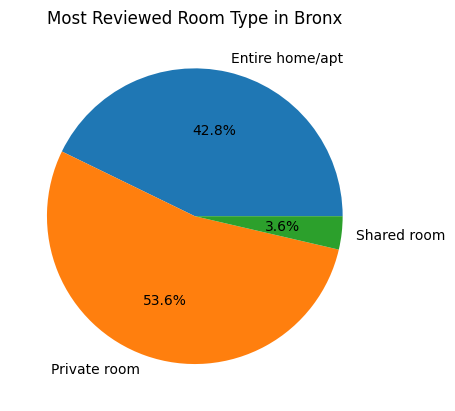

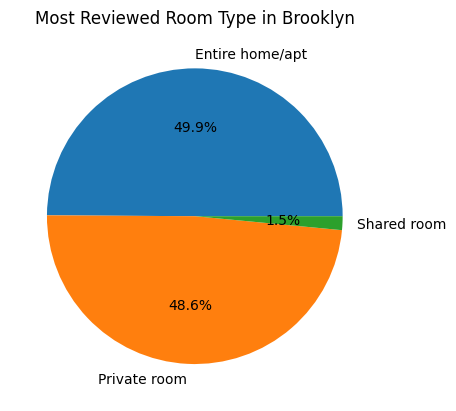

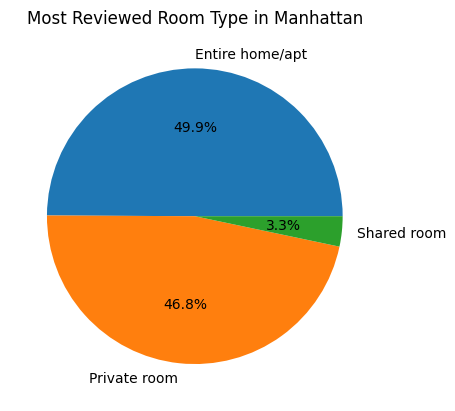

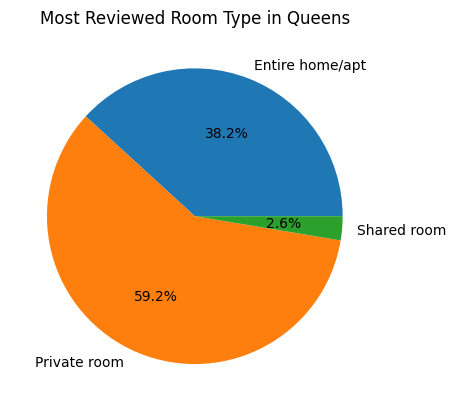

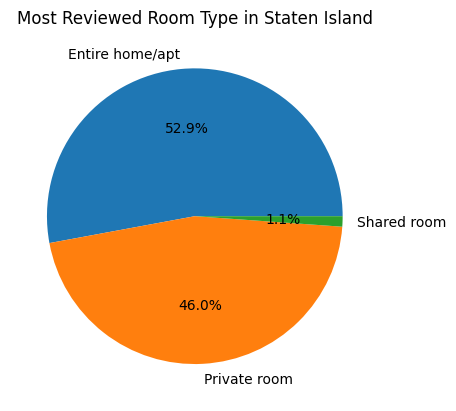

<Figure size 640x480 with 0 Axes>

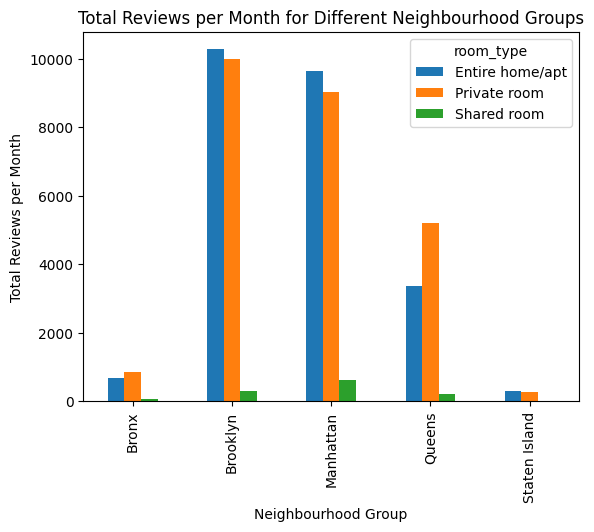

In [38]:
# Group the data by neighbourhood_group and room_type and calculate the sum of reviews_per_month
grouped_data = data.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].sum()

# Get the top reviewed room type for each neighbourhood_group
top_reviewed_room_type = grouped_data.groupby(level=0).idxmax()

# Create a pie chart for each neighbourhood_group
for neighbourhood_group, room_type in top_reviewed_room_type.items():
    # Filter data for the current neighbourhood_group
    group_data = grouped_data.loc[neighbourhood_group]

    # Create a pie chart
    plt.figure()
    plt.pie(group_data, labels=group_data.index, autopct="%1.1f%%")
    plt.title(f"Most Reviewed Room Type in {neighbourhood_group}")
    plt.show()

# Create a bar plot for different neighbourhood_groups
plt.figure()
grouped_data.unstack().plot(kind='bar')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Reviews per Month")
plt.title("Total Reviews per Month for Different Neighbourhood Groups")
plt.show()


**INTERPRETATION**  
The most reviewed room type for all the neighbourhoods in as below :  

Bronx - Private Room  
Brooklyn - Entire Home/Apt  
Manhattan - Entire Home/Apt  
Queens - Private  
Staten Island - Entire Home/Apt  

**Question10**  
Best location for travellers.

In [39]:
df10 = data[data.price < 300]
fig = px.scatter(df10, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()


In [40]:
### Let's plot a heatmap based on average prices in the neighbourhood of NYC 

# Create a map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Generate a HeatMap based on average prices
heatmap_data = data.groupby(['latitude', 'longitude'])['price'].mean().reset_index().values.tolist()
HeatMap(heatmap_data).add_to(nyc_map)

# Display the map
nyc_map

**INTERPRETATION**  

1. Areas with higher concentration of warmer colors indicate locations where the average airbnb prices are higher.  
2. These areas might be popular or desirable for travelers, potentially due to proximity to attractions, safety, or better amenities.  
3. Higher average prices in specific neighborhoods suggest increased demand for accommodations in those areas.  
Cooler areas on the heatmap may represent locations with lower average prices.  

**Question11**. Best location listing for hosts.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9424\1570356017.py:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



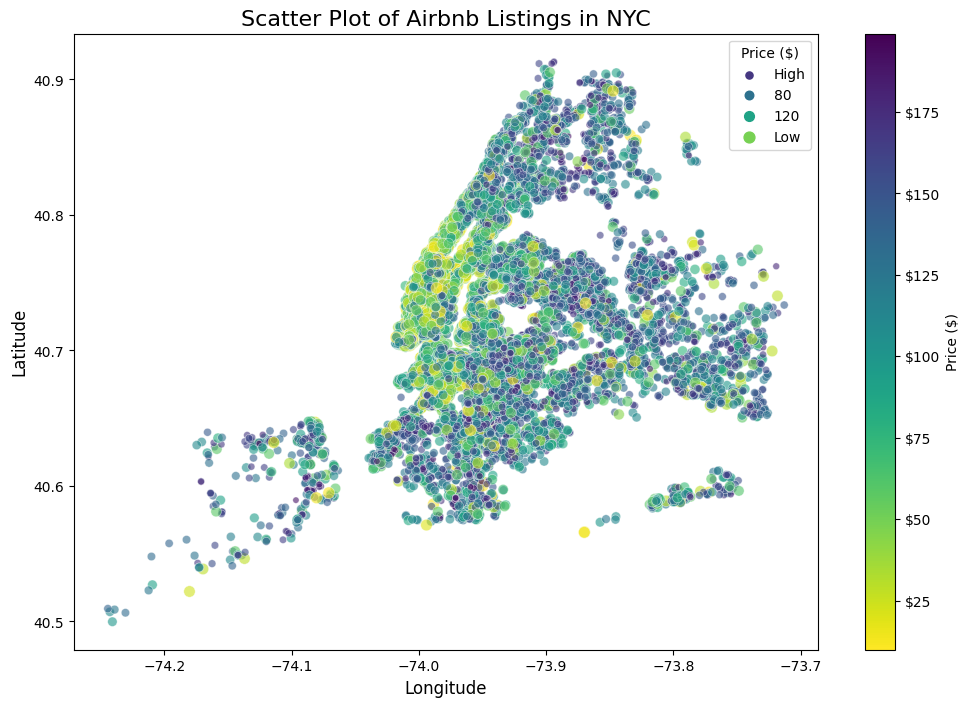

In [41]:

plt.figure(figsize=(12, 8))
#Since we have to find the best listing location for hosts, lets get the dataset for high prices only for them to get profit.
df11=data[data.price < 200]
# Create a scatter plot with inverted Viridis colormap
scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='price', size='price', data=df11, palette='viridis', alpha=0.6)

# Invert the colormap
scatter_plot.get_legend().get_title().set_text('Price ($)')
scatter_plot.get_legend().set_bbox_to_anchor((1, 1))
scatter_plot.get_legend().get_texts()[0].set_text('High')
scatter_plot.get_legend().get_texts()[-1].set_text('Low')

# Create a ScalarMappable to handle the color mapping
norm = Normalize(vmin=df11['price'].min(), vmax=df11['price'].max())
sm = ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])  # dummy empty array for the scalar mappable

# Add colorbar
cbar = plt.colorbar(sm, label='Price ($)', format='${x:,.0f}')

# Set title and labels
plt.title('Scatter Plot of Airbnb Listings in NYC', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

**INTERPRETATION**  

Hosts could explore places with these areas for potential opportunities, especially if they offer unique features or experiences.  
Hosts can attract budget-conscious travelers.  
They can get increased occupancy rates here.  
Lower-priced listings can be positioned to cater to specific niche markets or traveler demographics.  
 Hosts can identify unique features or amenities that appeal to a particular audience, such as solo travelers, students,etc.  
Hosts can use lower prices strategically by implementing short-term promotions or discounts during off-peak seasons or to fill last-minute vacancies.  

C:\Users\Admin\AppData\Local\Temp\ipykernel_9424\1481897835.py:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



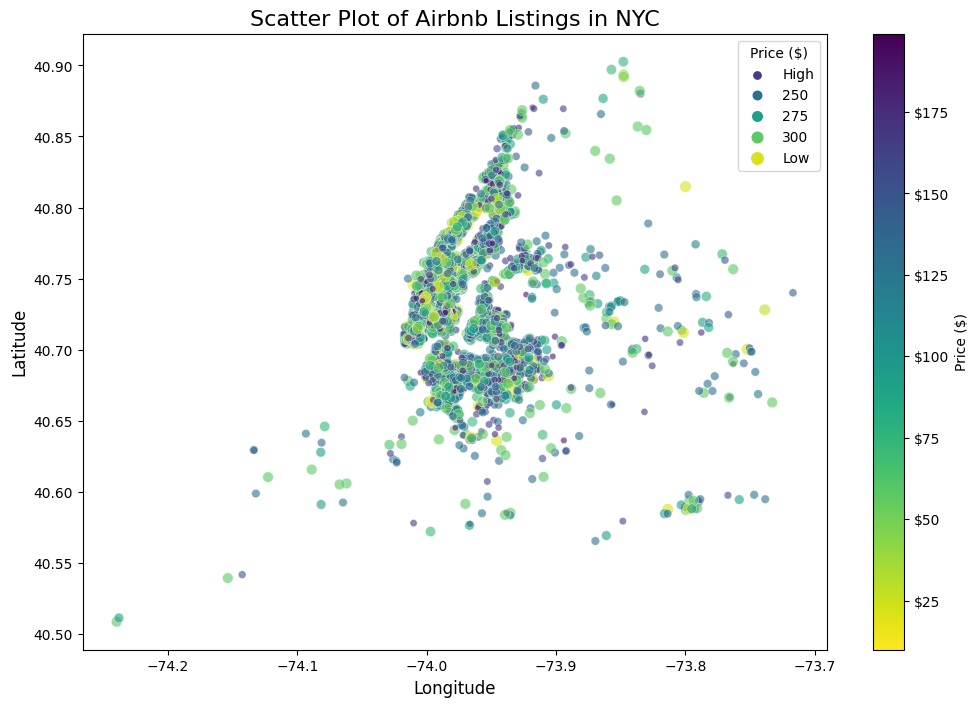

In [42]:
plt.figure(figsize=(12, 8))
#Since we have to find the best listing location for hosts, lets get the dataset for high prices only for them to get profit.
df11_2=data[data.price > 200]
# Create a scatter plot with inverted Viridis colormap
scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='price', size='price', data=df11_2, palette='viridis', alpha=0.6)

# Invert the colormap
scatter_plot.get_legend().get_title().set_text('Price ($)')
scatter_plot.get_legend().set_bbox_to_anchor((1, 1))
scatter_plot.get_legend().get_texts()[0].set_text('High')
scatter_plot.get_legend().get_texts()[-1].set_text('Low')

# Create a ScalarMappable to handle the color mapping
norm = Normalize(vmin=df11['price'].min(), vmax=df11['price'].max())
sm = ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])  # dummy empty array for the scalar mappable

# Add colorbar
cbar = plt.colorbar(sm, label='Price ($)', format='${x:,.0f}')

# Set title and labels
plt.title('Scatter Plot of Airbnb Listings in NYC', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

**INTERPRETATION**  

These areas have higher revenue protntial.  
Hosts in high-price areas may invest in premium property features and amenities to justify the elevated prices.   
This could include luxurious furnishings, unique experiences, or exclusive services that cater to the preferences of discerning travelers.  
While prices may be higher, hosts should still strive for a balanced occupancy rate to maximize overall revenue.

**Question12**. Find price variations in NYC Neighbour groups.

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

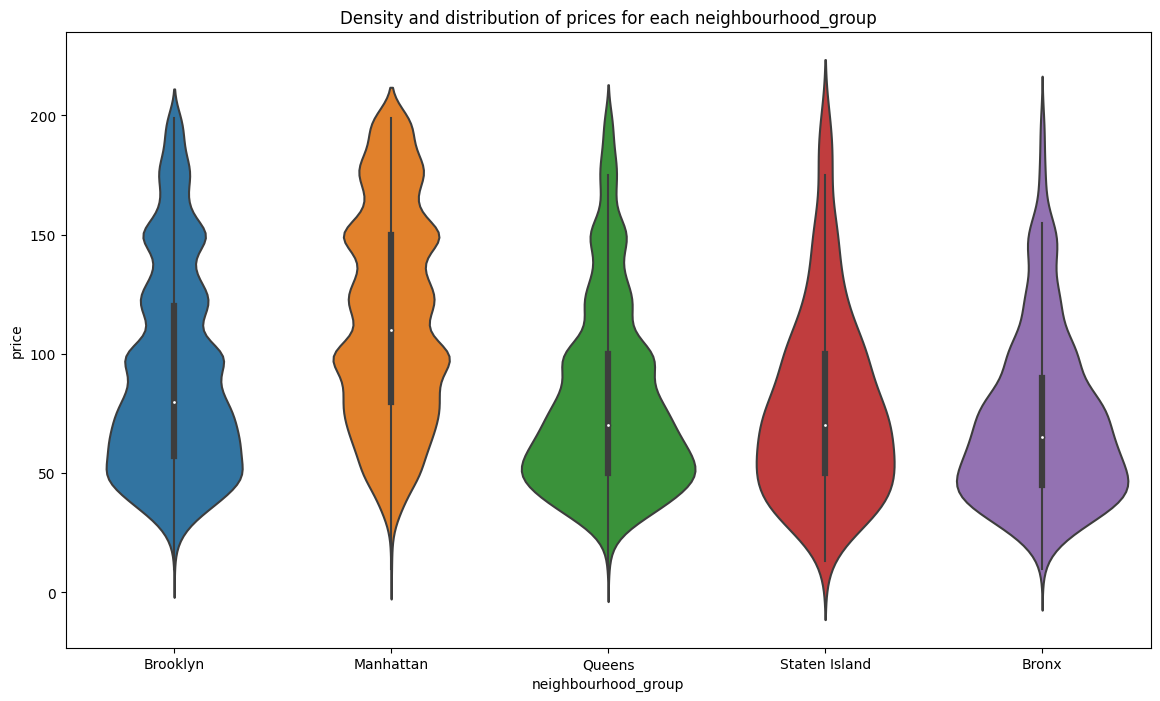

In [43]:
plt.figure(figsize=(14, 8))
#creating a sub-dataframe with no extreme values / less than 200
df10=data[data.price < 200]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=df10, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group')

**INTERPRETATION**
Price variation is as follows:  

1. Brooklyn - Highest density of price is around 50 and the density decreases gradually with increase in price.  
2. Manhattan - It's no secret that manhattan is one of the most expensive city to leave and out graph tells us  nothing less. Density is almost equally spread across all price range and has the lowest density/width in compare to other neighbourhoods. It's median is also the highest, almost around 110$.  
3. The spread of Queens and Bronx seems almost same. Only major diffrence is that with increase in price range.  
4. The density of Bronx is lower than Queens and Bronx has a bit more density towards lower price range  
5. The density of Staten Islan has quit a range, with lower price of about 25 and higher price of about 75, it has good density spread.The density narrows down with increase in price.  